<a href="https://colab.research.google.com/github/lwa01/229352-STAT-LEARING-FOR-DATA-SCI-2/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [54]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

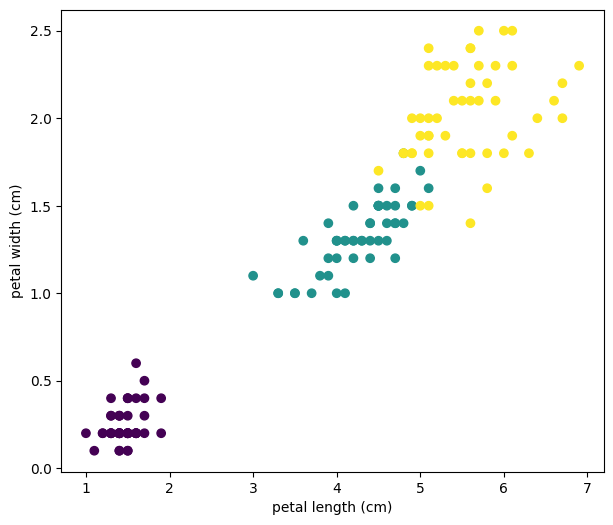

In [55]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [56]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [57]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

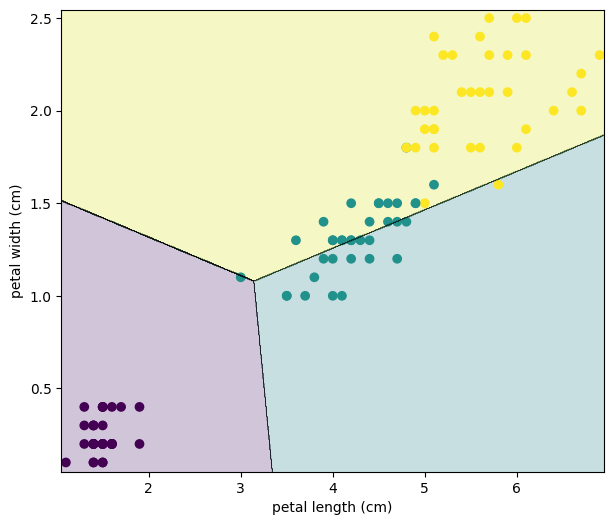

In [58]:
# Linear SVC
linsvm = LinearSVC(C=0.1)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm, X_train, y_train)

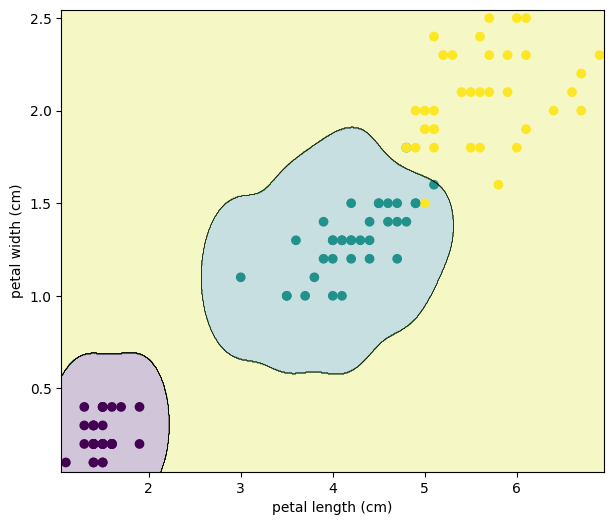

In [59]:
# SVM
svm = SVC(C=1.0, kernel='rbf', gamma=10)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X_train, y_train)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

C = 0.01


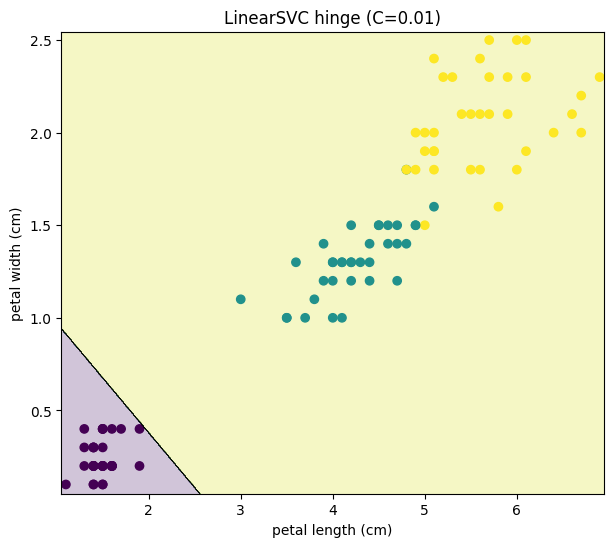

C = 0.1


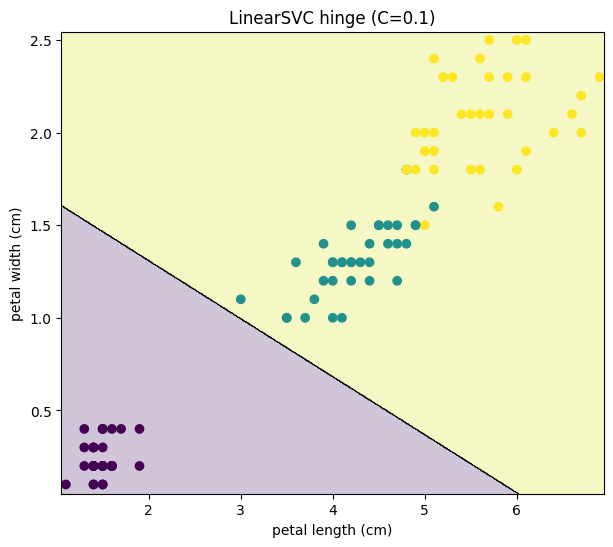

C = 1.0


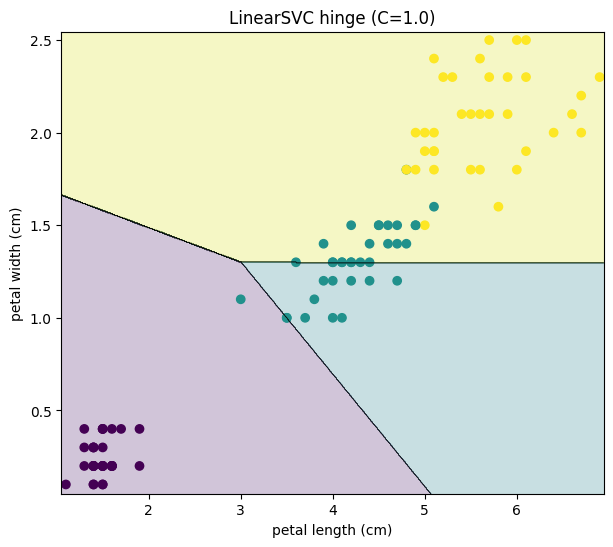

C = 10.0


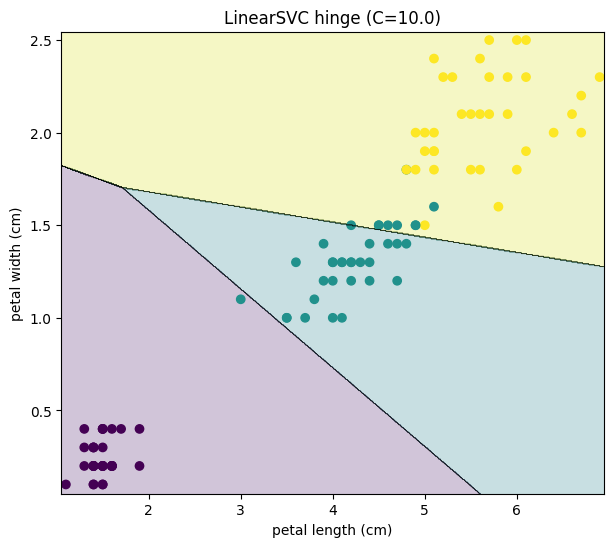

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 100.0


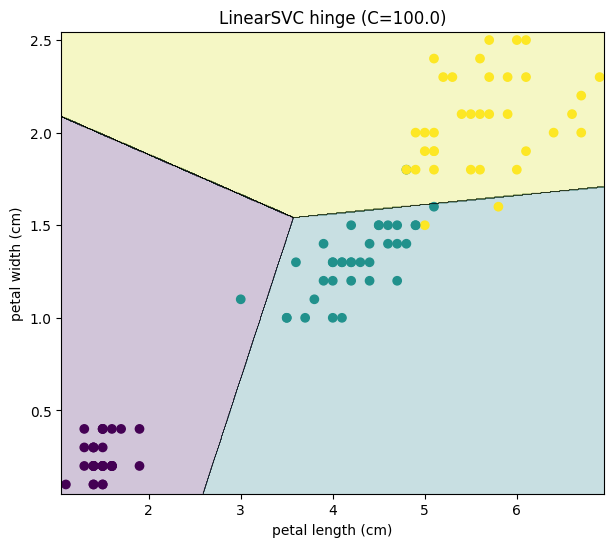

In [60]:
#TODO
C = [0.01, 0.1, 1.0, 10.0, 100.0]
for c in C:
    linsvm = LinearSVC(C=c, loss='hinge', max_iter=100000, dual="auto")
    linsvm.fit(X_train, y_train)
    print("C =", c)
    plot_decision_boundary(linsvm, X_train, y_train)
    plt.title(f"LinearSVC hinge (C={c})")
    plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [61]:
#TODO
C_like = 100.0
linsvm = LinearSVC(C=C_like, loss='hinge', max_iter=100000, dual="auto")
linsvm.fit(X_train, y_train)

test_acc = linsvm.score(X_test, y_test)
test_error = 1 - test_acc
print("Exercise 3 | C =", C_like, "test acc =", test_acc, "test error =", test_error)


Exercise 3 | C = 100.0 test acc = 0.8888888888888888 test error = 0.11111111111111116


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

gamma = 0.1


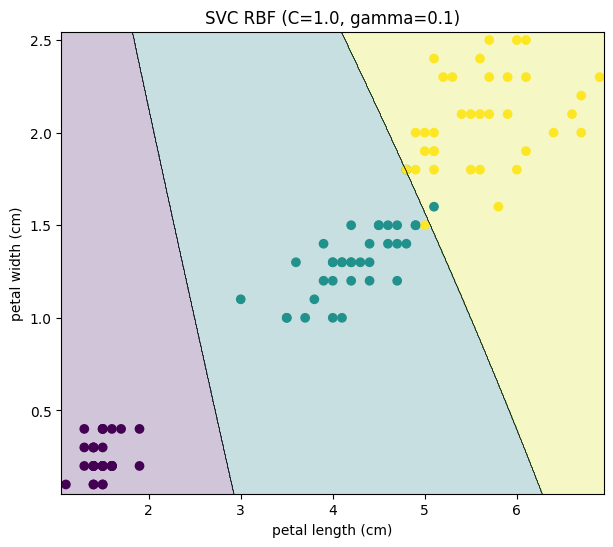

gamma = 1


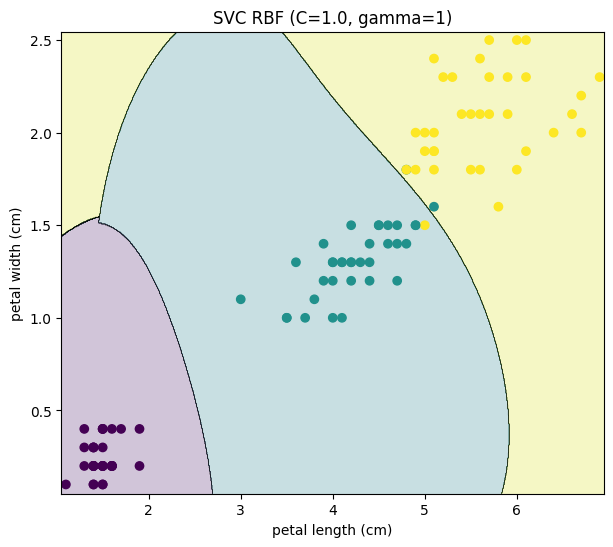

gamma = 10


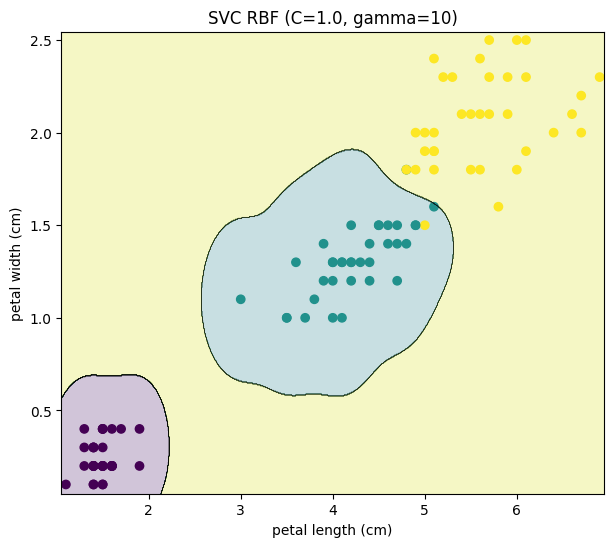

gamma = 100


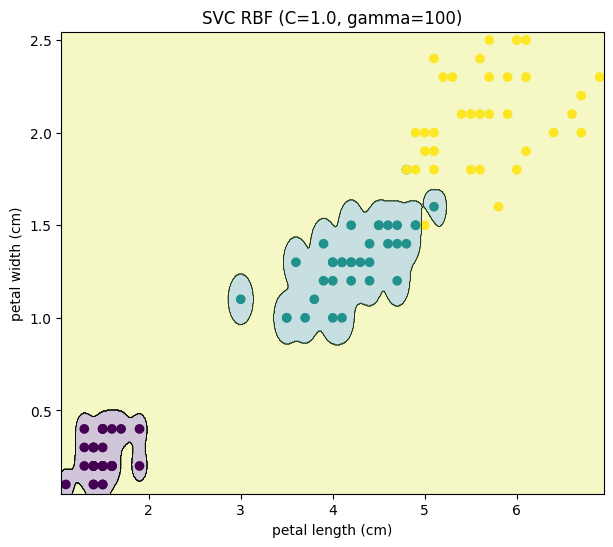

In [62]:
#TODO
gammas = [0.1, 1, 10, 100]
for g in gammas:
    svm = SVC(kernel='rbf', C=1.0, gamma=g, max_iter=100000)
    svm.fit(X_train, y_train)
    print("gamma =", g)
    plot_decision_boundary(svm, X_train, y_train)
    plt.title(f"SVC RBF (C=1.0, gamma={g})")
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [63]:
#TODO
gamma_like = 0.1
svm = SVC(kernel='rbf', C=1.0, gamma=gamma_like, max_iter=100000)
svm.fit(X_train, y_train)

test_acc = svm.score(X_test, y_test)
test_error = 1 - test_acc
n_sv_total = svm.n_support_.sum()

print("Exercise 5 | gamma =", gamma_like,
      "test acc =", test_acc,
      "test error =", test_error,
      "support vectors total =", n_sv_total,
      "per class =", svm.n_support_)


Exercise 5 | gamma = 0.1 test acc = 0.9555555555555556 test error = 0.0444444444444444 support vectors total = 37 per class = [ 4 18 15]


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [64]:
#TODO
lin_acc = linsvm.score(X_test, y_test)
rbf_acc = svm.score(X_test, y_test)

print("Exercise 6 | LinearSVC test acc:", lin_acc)
print("Exercise 6 | RBF SVC  test acc:", rbf_acc)

Exercise 6 | LinearSVC test acc: 0.8888888888888888
Exercise 6 | RBF SVC  test acc: 0.9555555555555556


ตอบ


1.   LinearSVC test acc = 0.8889
RBF SVC test acc = 0.9556
ดังนั้น เลือก Kernel SVM (RBF) เพราะให้ ความแม่นยำบน test สูงกว่า และทำให้ error ต่ำกว่า (Linear error = 1−0.8889 = 0.1111, RBF error = 1−0.9556 = 0.0444)
2.   LinearSVC จะให้เส้นแบ่งเป็น “เส้นตรง” (linear boundary) → บน Iris ที่ใช้แค่ 2 feature (petal length/width) มักแยกบางคลาส (โดยเฉพาะ versicolor กับ virginica) ได้ไม่ดี ทำให้มีจุดทับซ้อน/ผิดพลาดมากกว่า
RBF SVC (gamma=0.1) จะให้เส้นแบ่ง “โค้ง” ได้ → ปรับให้เข้ากับรูปแบบข้อมูลได้ดีขึ้น จึงแยกคลาสได้ชัดกว่าใน plot และไม่ซับซ้อนเกินไป (gamma=0.1 จะค่อนข้าง smooth ไม่หยักมากแบบ gamma สูง ๆ)
(เสริมได้) โมเดล RBF ของคุณใช้ support vectors รวม 37 จุด แปลว่ามีจุดสำคัญบนขอบเขตที่ช่วยกำหนดเส้นแบ่ง ทำให้เส้นแบ่งเหมาะกับข้อมูลมากขึ้น

